In [ ]:
import pandas as pd

# Load the data from the provided CSV file
data_path = '/content/drive/MyDrive/Modified_.csv'
startup_data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
startup_data.head(), startup_data.columns


(             Name Budget(in millions)      Stage  Digital Presence  \
 0           DISQO               16.50     Growth                 8   
 1         Salsify              252.60  Expansion                 9   
 2  MachineMetrics               37.65     Growth                 7   
 3           Minds               17.38     Growth                 6   
 4          Oyster               74.20     Growth                 8   
 
   Target Industry         End Goal Digital Marketing Strategy  
 0   Advertisement  Brand Awareness     Social Media Marketing  
 1           Sales            Sales            Email Marketing  
 2              IT            Leads     Social Media Marketing  
 3              IT  Brand Awareness     Social Media Marketing  
 4              HR            Leads                        SEO  ,
 Index(['Name', 'Budget(in millions)', 'Stage', 'Digital Presence',
        'Target Industry', 'End Goal', 'Digital Marketing Strategy'],
       dtype='object'))

In [ ]:
# Correct the column names by setting the second row as headers and then dropping it from the data
startup_data.columns = startup_data.iloc[0] # Set the column headers to the first row values
startup_data = startup_data.drop(0) # Drop the first row now that the headers are set

# Rename columns for easier handling
startup_data.columns = ['Name', 'Budget', 'Stage', 'Digital Presence', 'Target Industry', 'End Goal', 'Digital Marketing Strategy']

# Convert the Budget and Digital Presence to numerical values for processing
startup_data['Budget'] = pd.to_numeric(startup_data['Budget'], errors='coerce')
startup_data['Digital Presence'] = pd.to_numeric(startup_data['Digital Presence'], errors='coerce')

# Show the cleaned data frame and data types for verification
startup_data.head(), startup_data.dtypes


(             Name  Budget      Stage  Digital Presence Target Industry  \
 1         Salsify  252.60  Expansion                 9           Sales   
 2  MachineMetrics   37.65     Growth                 7              IT   
 3           Minds   17.38     Growth                 6              IT   
 4          Oyster   74.20     Growth                 8              HR   
 5          Curate    1.75       Seed                 5       Marketing   
 
           End Goal Digital Marketing Strategy  
 1            Sales            Email Marketing  
 2            Leads     Social Media Marketing  
 3  Brand Awareness     Social Media Marketing  
 4            Leads                        SEO  
 5  Brand Awareness     Social Media Marketing  ,
 Name                           object
 Budget                        float64
 Stage                          object
 Digital Presence                int64
 Target Industry                object
 End Goal                       object
 Digital Marketing 

In [ ]:
# Categorizing the Budget
startup_data['Budget Category'] = pd.cut(startup_data['Budget'], bins=[0, 0.1, 1, float('inf')],
                                         labels=['0-100,000', '100,000-1 million', 'Above 1 million'], right=False)

# Categorizing the Digital Presence
startup_data['Digital Presence Category'] = pd.cut(startup_data['Digital Presence'], bins=[0, 3, 6, 10],
                                                   labels=['0-3', '4-6', '7-10'], right=True)

# Categorizing Target Industry
startup_data['Industry Category'] = startup_data['Target Industry'].apply(lambda x: 'IT' if x == 'IT' else 'Non-IT')

# Extract the first preferred digital marketing strategy from the list
startup_data['Preferred Strategy'] = startup_data['Digital Marketing Strategy'].apply(lambda x: x.split('\n')[0].split('. ')[1] if '.' in x else x)

# Check the transformed data
startup_data[['Budget Category', 'Digital Presence Category', 'Industry Category', 'Preferred Strategy']].head()


,Budget Category,Digital Presence Category,Industry Category,Preferred Strategy
1,Above 1 million,7-10,Non-IT,Email Marketing
2,Above 1 million,7-10,IT,Social Media Marketing
3,Above 1 million,4-6,IT,Social Media Marketing
4,Above 1 million,7-10,Non-IT,SEO
5,Above 1 million,4-6,Non-IT,Social Media Marketing


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Initialize label encoders
le_stage = LabelEncoder()
le_budget = LabelEncoder()
le_digital_presence = LabelEncoder()
le_industry = LabelEncoder()
le_end_goal = LabelEncoder()
le_strategy = LabelEncoder()

# Encoding the categorical data
startup_data['Stage Encoded'] = le_stage.fit_transform(startup_data['Stage'])
startup_data['Budget Encoded'] = le_budget.fit_transform(startup_data['Budget Category'])
startup_data['Digital Presence Encoded'] = le_digital_presence.fit_transform(startup_data['Digital Presence Category'])
startup_data['Industry Encoded'] = le_industry.fit_transform(startup_data['Industry Category'])
startup_data['End Goal Encoded'] = le_end_goal.fit_transform(startup_data['End Goal'])
startup_data['Strategy Encoded'] = le_strategy.fit_transform(startup_data['Preferred Strategy'])

# Preparing the feature matrix and target vector
X = startup_data[['Budget Encoded', 'Stage Encoded', 'Digital Presence Encoded', 'Industry Encoded', 'End Goal Encoded']]
y = startup_data['Strategy Encoded']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = tree_model.predict(X_test)
accuracy_percent = accuracy_score(y_test, y_pred)*100
accuracy_percent


71.42857142857143

In [ ]:
# Function to map encoded values back to original labels for visualization
def map_category(value, encoder):
    index = list(encoder.transform(encoder.classes_)).index(value)
    return encoder.classes_[index]

In [ ]:
# Displaying the explicit mappings for each encoder
encoder_mappings = {
    "Budget": {index: label for index, label in enumerate(le_budget.classes_)},
    "Stage": {index: label for index, label in enumerate(le_stage.classes_)},
    "Digital Presence": {index: label for index, label in enumerate(le_digital_presence.classes_)},
    "Industry": {index: label for index, label in enumerate(le_industry.classes_)},
    "End Goal": {index: label for index, label in enumerate(le_end_goal.classes_)},
    "Preferred Strategy": {index: label for index, label in enumerate(le_strategy_clean.classes_)}
}

encoder_mappings


{'Budget': {0: '0-100,000',
  1: '100,000-1 million',
  2: 'Above 1 million',
  3: nan},
 'Stage': {0: 'Expansion', 1: 'Growth', 2: 'Pre-Seed', 3: 'Seed'},
 'Digital Presence': {0: '0-3', 1: '4-6', 2: '7-10', 3: nan},
 'Industry': {0: 'IT', 1: 'Non-IT'},
 'End Goal': {0: 'Brand Awareness',
  1: 'Conversion',
  2: 'Decision Making',
  3: 'Leads',
  4: 'Sales'},
 'Preferred Strategy': {0: 'Email Marketing',
  1: 'SEO',
  2: 'Social Media Marketing'}}

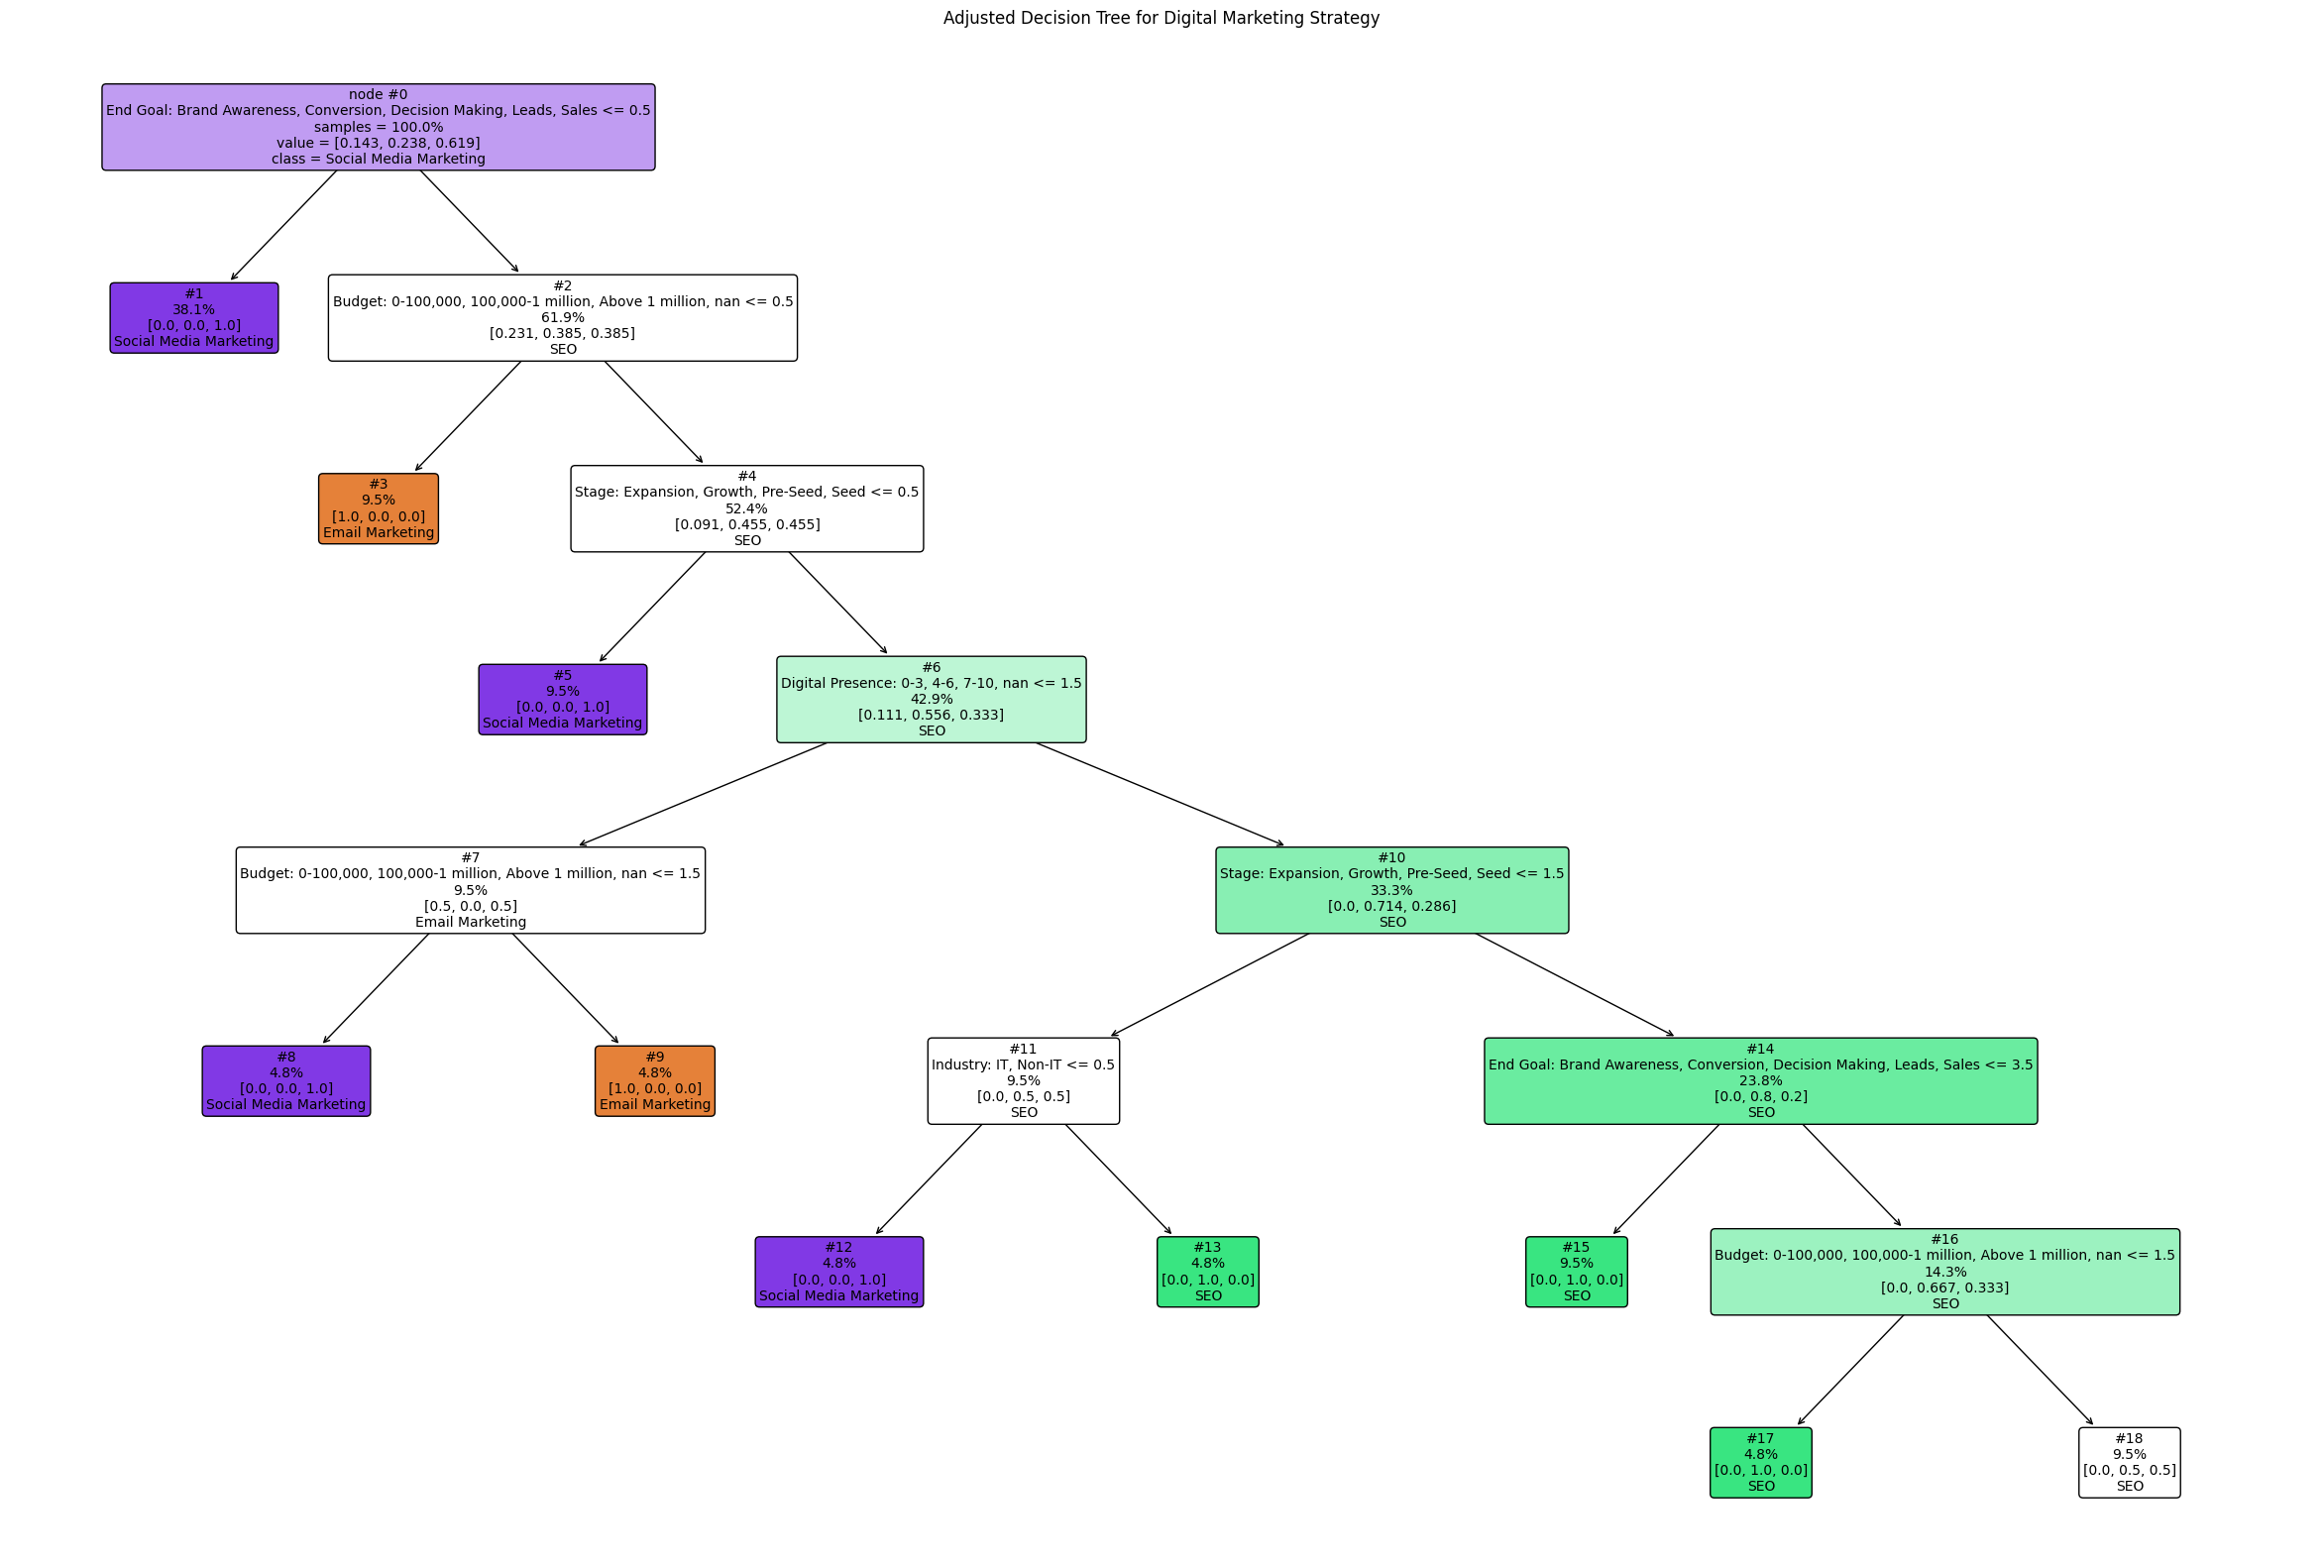

In [ ]:
# Redrawing the decision tree with better layout and adjusted parameters to avoid text overlap
# plt.figure(figsize=(30, 20))  # Increase figure size for better clarity
# tree_plot = plot_tree(
#     tree_model_clean,
#     filled=True,
#     feature_names=[
#         'Budget: ' + ', '.join([f"{map_category(i, le_budget)}" for i in range(len(le_budget.classes_))]),
#         'Stage: ' + ', '.join(le_stage.classes_),
#         'Digital Presence: ' + ', '.join([f"{map_category(i, le_digital_presence)}" for i in range(len(le_digital_presence.classes_))]),
#         'Industry: ' + ', '.join(le_industry.classes_),
#         'End Goal: ' + ', '.join(le_end_goal.classes_)
#     ],
#     class_names=[map_category(i, le_strategy_clean) for i in range(len(le_strategy_clean.classes_))],
#     label='root',
#     impurity=False,  # Remove Gini index
#     proportion=True,  # Show proportions for clearer interpretation
#     rounded=True,  # Rounded corners for a cleaner look
#     fontsize=10,  # Adjust font size for better readability
#     max_depth=None,  # Expand all nodes
#     node_ids=True  # Show node IDs to aid explanation
# )
# plt.title('Adjusted Decision Tree for Digital Marketing Strategy')
# plt.show()


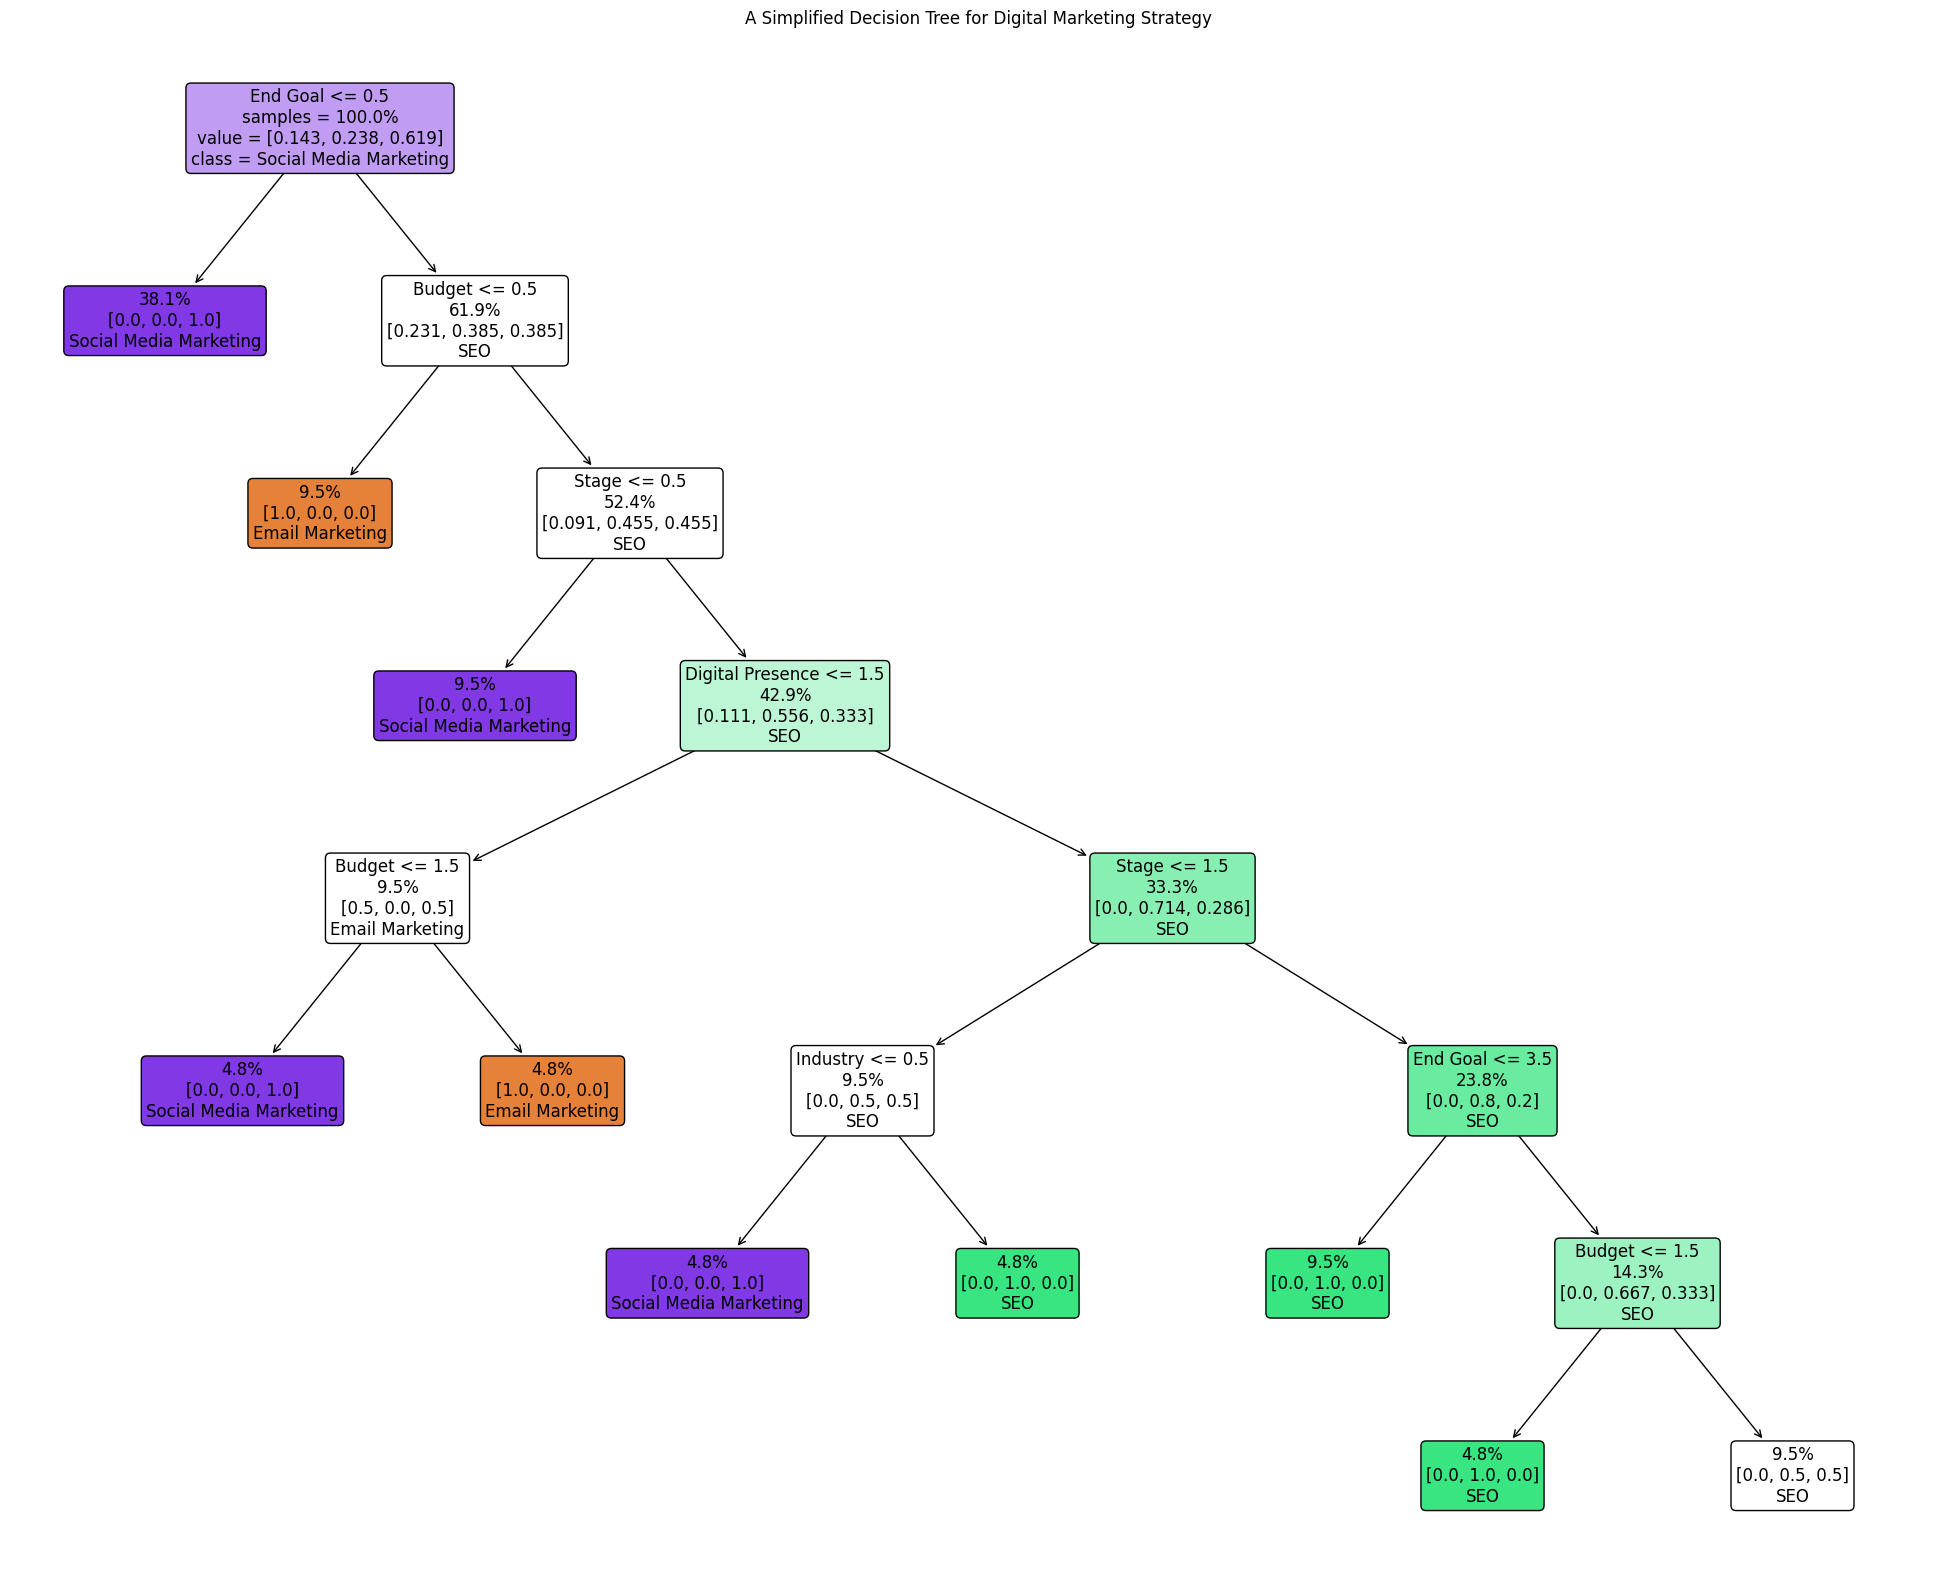

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 20))  # Adjusting the size for better visibility
tree_plot = plot_tree(
    tree_model_clean,
    filled=True,
    feature_names=[
        'Budget',  # Simplified labels
        'Stage',
        'Digital Presence',
        'Industry',
        'End Goal'
    ],
    class_names=[map_category(i, le_strategy_clean) for i in range(len(le_strategy_clean.classes_))],
    label='root',
    impurity=False,  # Remove Gini index
    proportion=True,  # Remove sample size to focus on the splits
    rounded=True,  # Rounded corners for a cleaner look
    fontsize=12,  # Adjust font size for better readability
    max_depth=None  # Ensure all nodes are expanded
)
plt.title('A Simplified Decision Tree for Digital Marketing Strategy')
plt.show()

